In [310]:
import pandas as pd
import seaborn as sns
from math import log2
import matplotlib.pyplot as plt

# set figure size and resolution
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.interpolation'] = 1200

# set fonts
plt.rcParams['axes.unicode_minus']= False

# set lines & line markers
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 10
plt.rcParams["lines.markerfacecolor"] = "000000"
plt.rcParams["lines.markeredgecolor"] = "ffffff"
plt.rcParams["lines.markeredgewidth"] = 10

# set legend
plt.rcParams["legend.facecolor"] = "ffffff"
plt.rcParams["legend.title_fontsize"] = 15
plt.rcParams["legend.fontsize"] = 15

# set axes
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

# set palette and style
sns.set_palette("Dark2")
# sns.set_style("whitegrid")
sns.set_style("darkgrid")

In [311]:
base = pd.read_csv("result/ploted_result.csv", index_col=0)
base["capacity"] = base["capacity"].map(lambda x: log2(x))
# df = df[(df["bucket_size"] == 4) & (df["type"] != "FIRST") & (df["bucket_size"] <= 8)]
# df

           alpha
type            
AWARE   0.958899
FIRST   0.725281
RANDOM  0.952435
RR      0.964445


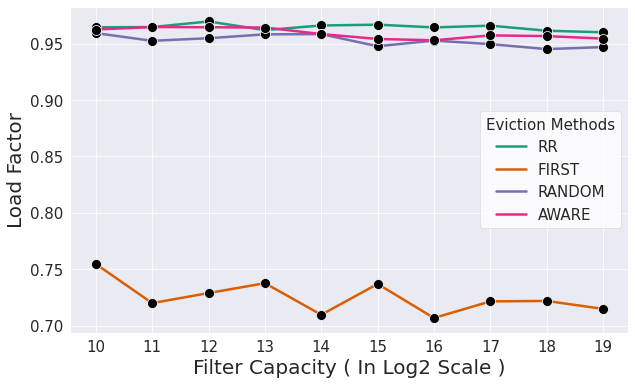

In [332]:
df = base[(base["bucket_size"] == 4)]
xtick = plt.xticks(range(10, 20))
print(df.groupby("type").agg({"alpha": "mean"}))
# ylim = plt.yticks([0.7, 0.8, 0.9, 1.0])
xlabel = plt.xlabel("Filter Capacity ( In Log2 Scale )")
ylabel = plt.ylabel("Load Factor")
fig = sns.lineplot(data=df, x="capacity", y="alpha", hue="type", marker="o")
lgd = plt.legend(loc='center right', title="Eviction Methods")

0.4399717514124294


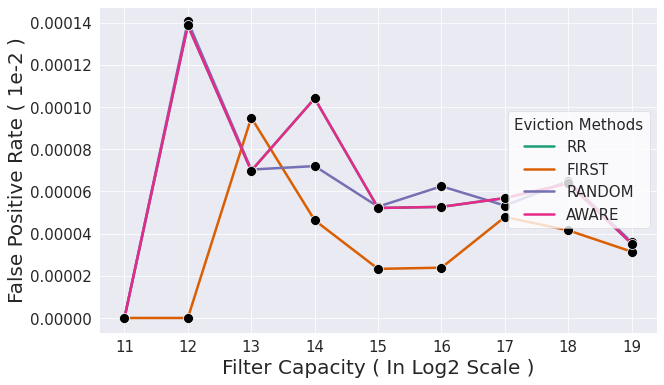

In [321]:
df = base[(base["bucket_size"] == 2)]
xlabel = plt.xlabel("Filter Capacity ( In Log2 Scale )")
ylabel = plt.ylabel("False Positive Rate ( 1e-2 )")
df = df[df["capacity"] > 10]
# df["fpr"] *= 10**2
improvement = df.groupby("type").agg({"fpr": "mean"})
print((improvement["fpr"]["RANDOM"] - improvement["fpr"]["FIRST"]) / improvement["fpr"]["RANDOM"])
fig = sns.lineplot(data=df, x="capacity", y="fpr", hue="type", marker="o")
lgd = plt.legend(loc='center right', title="Eviction Methods")

          rehash
type            
AWARE   8.055434
FIRST   3.350902
RANDOM  8.843150
RR      7.474562


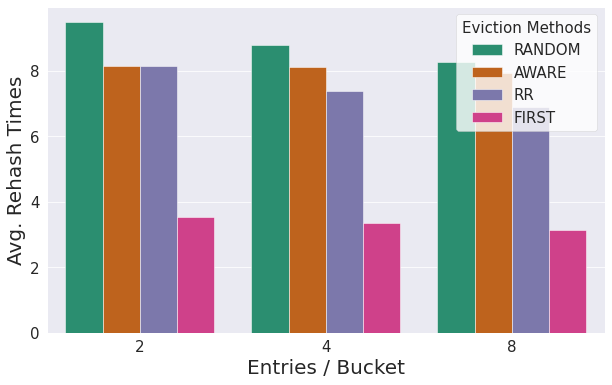

In [325]:
df = base.groupby(["type", "bucket_size"], as_index=False).agg({"rehash": "mean"})
df = df.sort_values("rehash", ascending=False)
print(df.groupby("type").agg({"rehash": "mean"}))
fig = sns.barplot(data=df, y="rehash", x="bucket_size", hue="type")
xlabel = plt.xlabel("Entries / Bucket")
ylabel = plt.ylabel("Avg. Rehash Times")
lgd = plt.legend(loc='upper right', title="Eviction Methods")

# plt.rcParams['figure.figsize'] = (6, 6)
# xlabel = plt.xlabel("Filter Capacity ( In Log2 Scale )")
# ylabel = plt.ylabel("False Positive Rate ( 1e-2 )")
# df = df[df["capacity"] > 10]
# df["fpr"] *= 10**2
# fig = sns.lineplot(data=df, x="capacity", y="fpr", hue="type", marker="o")


0.0625


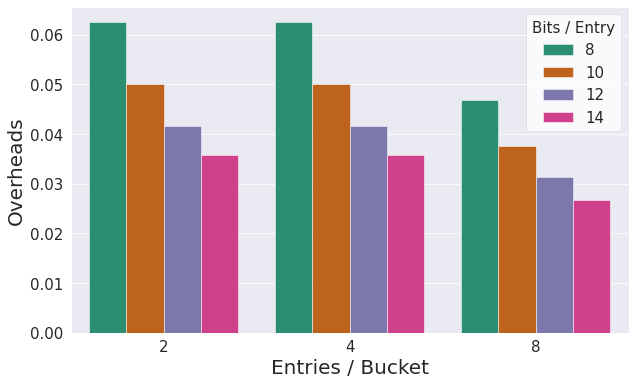

In [326]:
from math import log2
import pandas as pd
def overhead(x, fg_size):
    return log2(x) / x / fg_size
# plt.rcParams['figure.figsize'] = (6, 6)
df = pd.DataFrame(columns=["entry-per-bucket", "bits-per-entry", "overhead"])
for i in [2, 4, 8]:
    for j in range(8, 16, 2):
        overhead_ = overhead(i, j)
        df = df.append(dict(zip(df.columns, [i, j, overhead_])), ignore_index=True)

df["entry-per-bucket"] = df["entry-per-bucket"].astype(int)
df["bits-per-entry"] = df["bits-per-entry"].astype(int)
print(max(df["overhead"]))

fig = sns.barplot(data=df, y="overhead", x="entry-per-bucket", hue="bits-per-entry")
xlabel = plt.xlabel("Entries / Bucket")
ylabel = plt.ylabel("Overheads")
lgd = plt.legend(title="Bits / Entry")